# Get data

Load dataset 

In [23]:
!python3 -m pip install pandas matplotlib seaborn -U --break-system-packages

Defaulting to user installation because normal site-packages is not writeable


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
import glob
import os



In [51]:
# Step 1: Get all txt file paths in the folder
file_paths = glob.glob("../OpalPatronage/Opal_Patronage_*.txt")

# Optional: Sort by date in filename
file_paths.sort()

# Step 2: Read all files into one DataFrame
df_list = []
for path in file_paths:
    print(f"Reading: {path}")
    df = pd.read_csv(path, sep='|')
    df_list.append(df)

# Step 3: Concatenate into one DataFrame
full_df = pd.concat(df_list, ignore_index=True)

# Step 4 (Optional): Convert <100 to NaN or estimate
def convert(x):
    try:
        return int(x)
    except:
        return 0  # or return 50

full_df['Tap_Ons'] = full_df['Tap_Ons'].apply(convert)
full_df['Tap_Offs'] = full_df['Tap_Offs'].apply(convert)

# Done: Preview
print(full_df.head())


Reading: ../OpalPatronage/Opal_Patronage_20200101.txt
Reading: ../OpalPatronage/Opal_Patronage_20200102.txt
Reading: ../OpalPatronage/Opal_Patronage_20200103.txt
Reading: ../OpalPatronage/Opal_Patronage_20200104.txt
Reading: ../OpalPatronage/Opal_Patronage_20200105.txt
Reading: ../OpalPatronage/Opal_Patronage_20200106.txt
Reading: ../OpalPatronage/Opal_Patronage_20200107.txt
Reading: ../OpalPatronage/Opal_Patronage_20200108.txt
Reading: ../OpalPatronage/Opal_Patronage_20200109.txt
Reading: ../OpalPatronage/Opal_Patronage_20200110.txt
Reading: ../OpalPatronage/Opal_Patronage_20200111.txt
Reading: ../OpalPatronage/Opal_Patronage_20200112.txt
Reading: ../OpalPatronage/Opal_Patronage_20200113.txt
Reading: ../OpalPatronage/Opal_Patronage_20200114.txt
Reading: ../OpalPatronage/Opal_Patronage_20200115.txt
Reading: ../OpalPatronage/Opal_Patronage_20200116.txt
Reading: ../OpalPatronage/Opal_Patronage_20200117.txt
Reading: ../OpalPatronage/Opal_Patronage_20200118.txt
Reading: ../OpalPatronage/Op

In [52]:
full_df.head(11)

,trip_origin_date,mode_name,ti_region,tap_hour,Tap_Ons,Tap_Offs
0,2020-01-01,Bus,Chatswood,0,0,0
1,2020-01-01,Bus,Macquarie Park,0,0,0
2,2020-01-01,Bus,Newcastle and surrounds,0,0,0
3,2020-01-01,Bus,North Sydney,0,700,100
4,2020-01-01,Bus,Other,0,4500,3200
5,2020-01-01,Bus,Parramatta,0,100,0
6,2020-01-01,Bus,Strathfield,0,0,0
7,2020-01-01,Bus,Sydney CBD,0,3200,200
8,2020-01-01,Bus,All - NSW,0,8500,3500
9,2020-01-01,Bus,Chatswood,1,200,200


In [53]:
full_df.describe()

,Tap_Ons,Tap_Offs
count,1.372294e+06,1.372294e+06
mean,3.979451e+03,3.979765e+03
std,1.161666e+04,1.155232e+04
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,3.000000e+02,3.000000e+02
75%,1.600000e+03,1.600000e+03
max,1.721000e+05,2.072000e+05


In [54]:
full_df['mode_name'].unique()

array(['Bus', 'Ferry', 'Light rail', 'Train', 'UNKNOWN'], dtype=object)

In [55]:
# Drop rows where mode_name is 'UNKNOWN'
full_df = full_df[full_df['mode_name'] != 'UNKNOWN']

In [56]:
full_df['ti_region'].unique()

array(['Chatswood', 'Macquarie Park', 'Newcastle and surrounds',
       'North Sydney', 'Other', 'Parramatta', 'Strathfield', 'Sydney CBD',
       'All - NSW', 'Wollongong and surrounds'], dtype=object)

In [57]:
full_df['tap_hour'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23], dtype=object)

In [58]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327188 entries, 0 to 1372291
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   trip_origin_date  1327188 non-null  object
 1   mode_name         1327188 non-null  object
 2   ti_region         1327188 non-null  object
 3   tap_hour          1327188 non-null  object
 4   Tap_Ons           1327188 non-null  int64 
 5   Tap_Offs          1327188 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 70.9+ MB


In [59]:
full_df.groupby(['mode_name', 'ti_region']).size()


mode_name   ti_region               
Bus         All - NSW                   48504
            Chatswood                   48439
            Macquarie Park              48440
            Newcastle and surrounds     40387
            North Sydney                48355
            Other                       48504
            Parramatta                  48502
            Strathfield                 48356
            Sydney CBD                  48504
            Wollongong and surrounds    37314
Ferry       All - NSW                   40873
            Newcastle and surrounds     36445
            North Sydney                35965
            Other                       40262
            Parramatta                  18598
            Sydney CBD                  40346
Light rail  All - NSW                   46255
            Newcastle and surrounds     40187
            North Sydney                   62
            Other                       45745
            Parramatta                   45

In [60]:
full_df['trip_origin_date'] = pd.to_datetime(full_df['trip_origin_date'])

In [61]:
full_df['tap'] = pd.to_datetime(full_df['trip_origin_date'])

In [62]:
full_df['tap_hour']=pd.to_numeric(full_df['tap_hour'])

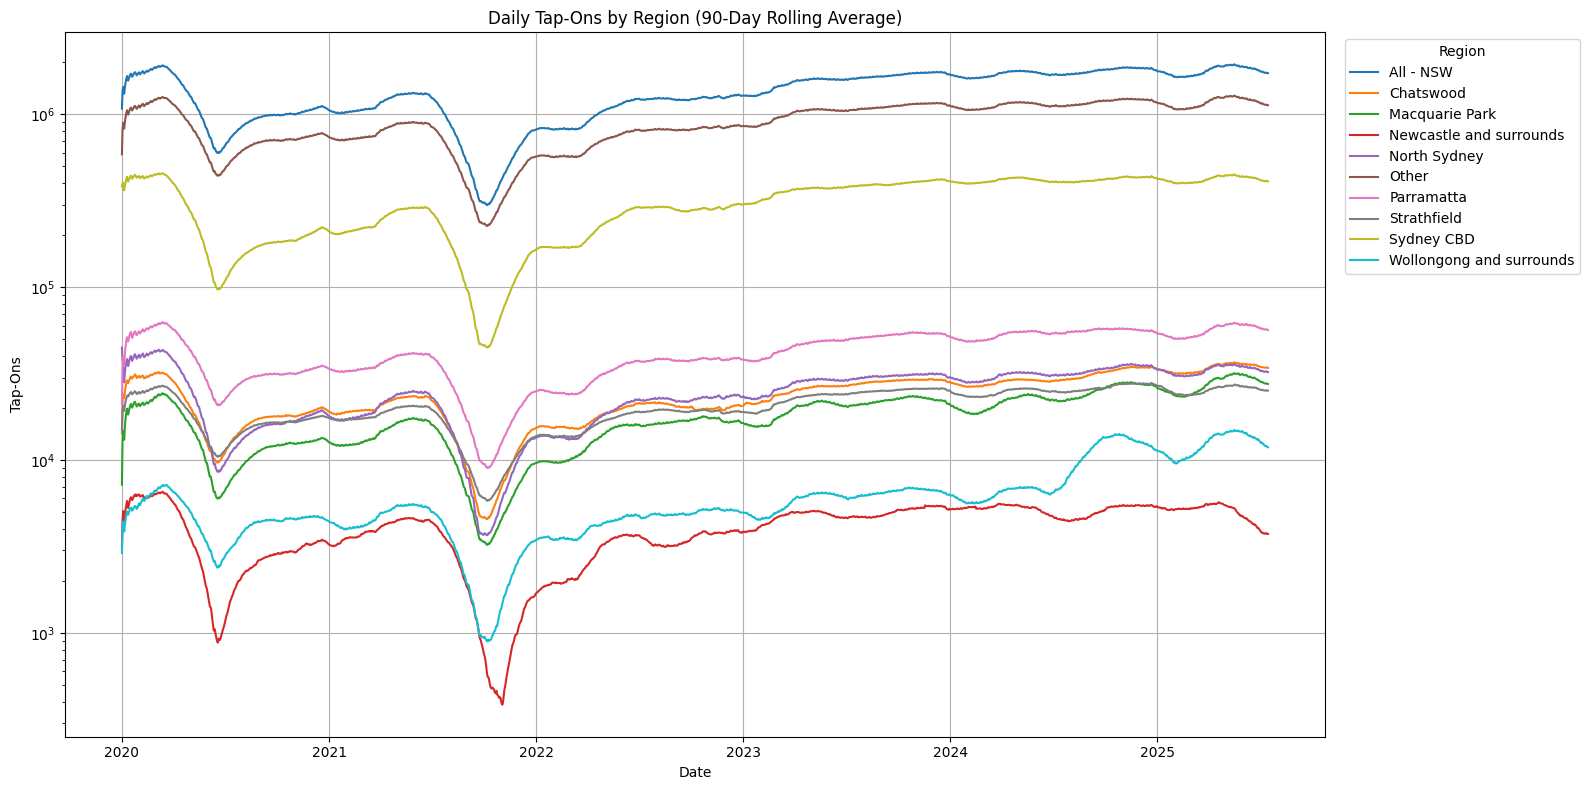

In [63]:
# Group by date and region, then sum
region_daily = full_df.groupby(['trip_origin_date', 'ti_region'])['Tap_Ons'].sum().unstack()

# Apply 7-day rolling average
region_daily_smoothed = region_daily.rolling(window='90D', min_periods=1).mean()

# Plot
plt.figure(figsize=(16,8))
for region in region_daily_smoothed.columns:
    plt.plot(region_daily_smoothed.index, region_daily_smoothed[region], label=region)

plt.title("Daily Tap-Ons by Region (90-Day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Tap-Ons")
plt.yscale("log")
plt.legend(title="Region", loc='upper left', bbox_to_anchor=(1.01, 1))
plt.tight_layout()
plt.grid(True)
plt.show()

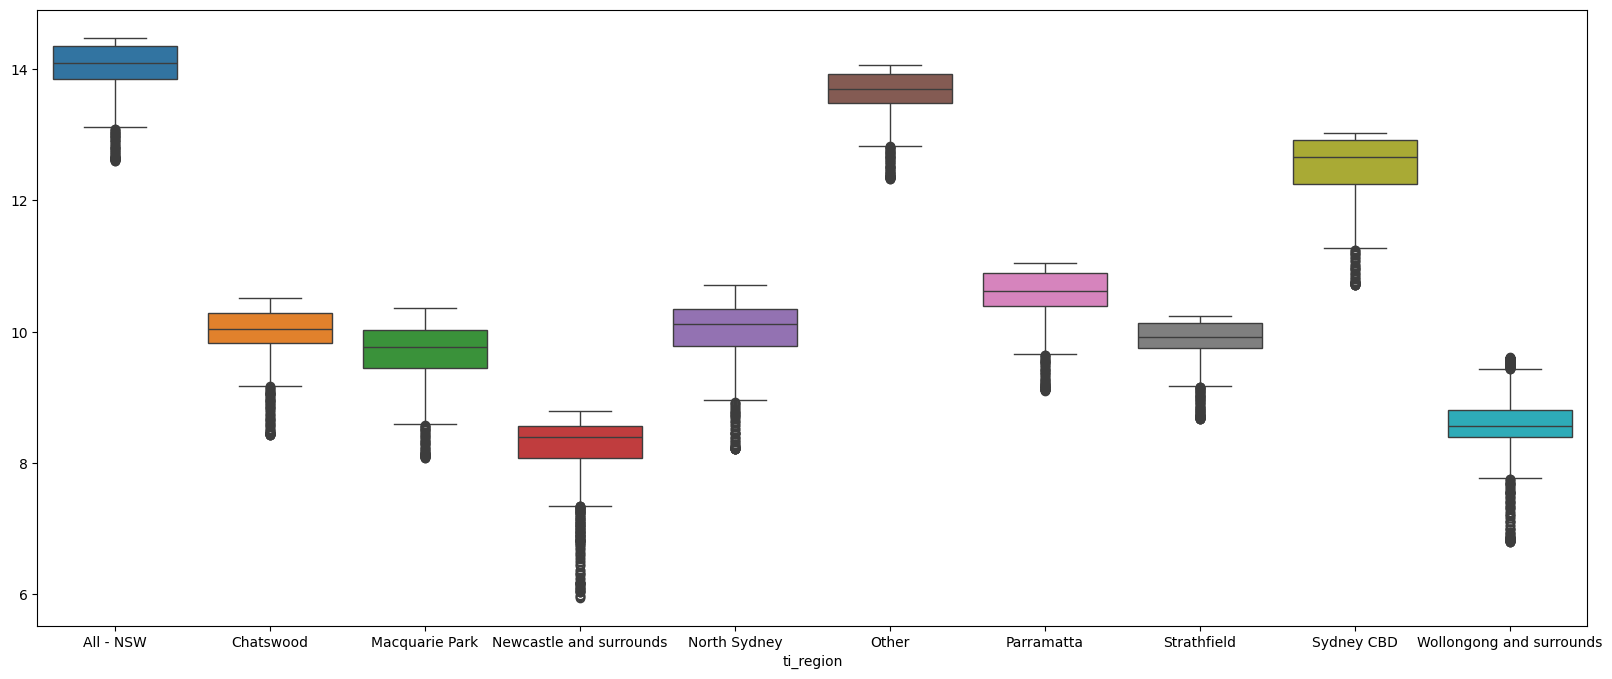

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(np.log(region_daily_smoothed))
plt.show()

          mean    median     stdev  n_weeks
era                                        
post  0.842744  0.842587  0.164558      134
pre   1.065607  0.959597  0.280549        9


<Axes: title={'center': 'Friday-to-Mon-Thu AM-peak ratio (pre vs post)'}, xlabel='era'>

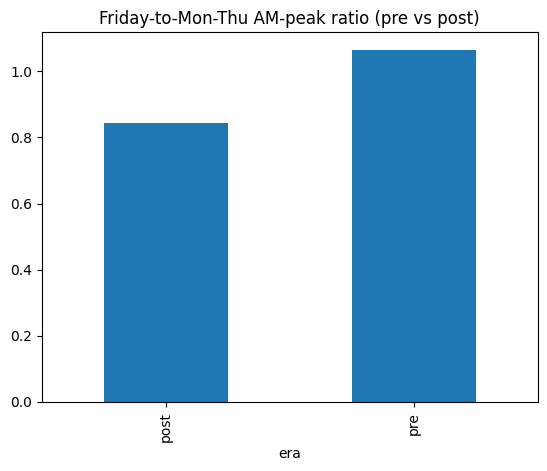

In [64]:
# --- 0.  Make a working copy and clean obvious junk --------------------------
df = full_df.copy()

# drop rows that are just blank padding lines in the source files
df = df[df['trip_origin_date'].notna()]

# keep TRAIN trips only – comment this line out if you want buses as well
# df = df[df['mode_name'].str.lower() == 'train']

# force the date dtype
df['trip_origin_date'] = pd.to_datetime(df['trip_origin_date'])

# --- 1.  Focus on the AM-peak window ----------------------------------------
# 07:00 ≤ hour < 10:00  (tap_hour is numeric: 7, 8, 9)
peak = df[(df['tap_hour'] >= 7) & (df['tap_hour'] < 10)].copy()

# --- 2.  Add calendar helpers -----------------------------------------------
peak['dow']  = peak['trip_origin_date'].dt.dayofweek        # 0=Mon … 4=Fri
peak['year'] = peak['trip_origin_date'].dt.year

# define “pre-COVID” vs “hybrid era”.  Adjust dates if you like.
pre_mask  = peak['trip_origin_date'] <  '2020-03-01'
post_mask = peak['trip_origin_date'] >= '2023-01-01'
peak['era'] = np.where(pre_mask, 'pre', np.where(post_mask, 'post', 'ignore'))
peak = peak[peak['era'] != 'ignore']         # toss 2020-22 transition if not needed

# --- 3.  Aggregate: total Tap_Ons per date & DOW -----------------------------
daily = (peak
         .groupby(['era','trip_origin_date','dow'], as_index=False)['Tap_Ons']
         .sum())

# --- 4.  Convert to week-level and compute Friday ratio ----------------------
# ISO week key so Jan 1 of each year doesn’t mix
daily['iso_year'] = daily['trip_origin_date'].dt.isocalendar().year
daily['iso_week'] = daily['trip_origin_date'].dt.isocalendar().week
daily['yrwk'] = daily['iso_year'] * 100 + daily['iso_week']   # e.g. 202452

weekly = (daily
          .pivot_table(index=['era','yrwk'], columns='dow', values='Tap_Ons')
          .rename(columns={0: 'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri'}))

weekly['Tue_Thu_mean'] = weekly[['Mon', 'Tue','Wed','Thu']].mean(axis=1)
weekly['fri_ratio']    = weekly['Fri'] / weekly['Tue_Thu_mean']

# --- 5.  Summarise & inspect -------------------------------------------------
summary = (weekly.groupby('era')['fri_ratio']
                  .agg(mean='mean', median='median', stdev='std', n_weeks='size'))
print(summary)

# optional: quick bar chart
summary['mean'].plot.bar(title='Friday-to-Mon-Thu AM-peak ratio (pre vs post)')

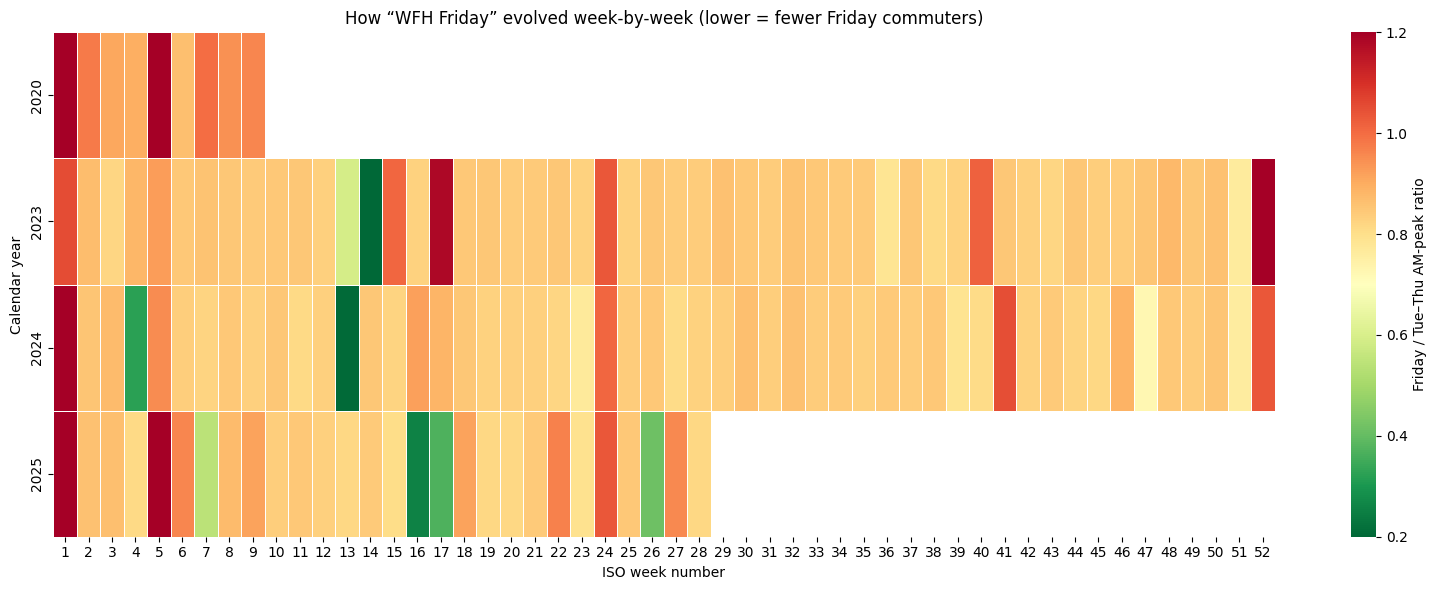

In [37]:
heat = weekly.reset_index()             # columns: era, yrwk, ..., fri_ratio
heat['year'] = heat['yrwk'] // 100
heat['week'] = heat['yrwk']  % 100

# pivot so each row is a calendar year, each column an ISO week number
pivot = heat.pivot_table(index='year', columns='week', values='fri_ratio')

plt.figure(figsize=(16, 6))
sns.heatmap(
    pivot,
    cmap='RdYlGn_r',
    vmin=0.2, vmax=1.2,   # tweak if your ratios go wider
    linewidths=.5,
    cbar_kws={'label': 'Friday / Tue–Thu AM-peak ratio'}
)
plt.title('How “WFH Friday” evolved week-by-week (lower = fewer Friday commuters)')
plt.ylabel('Calendar year')
plt.xlabel('ISO week number')
plt.tight_layout()
plt.show()


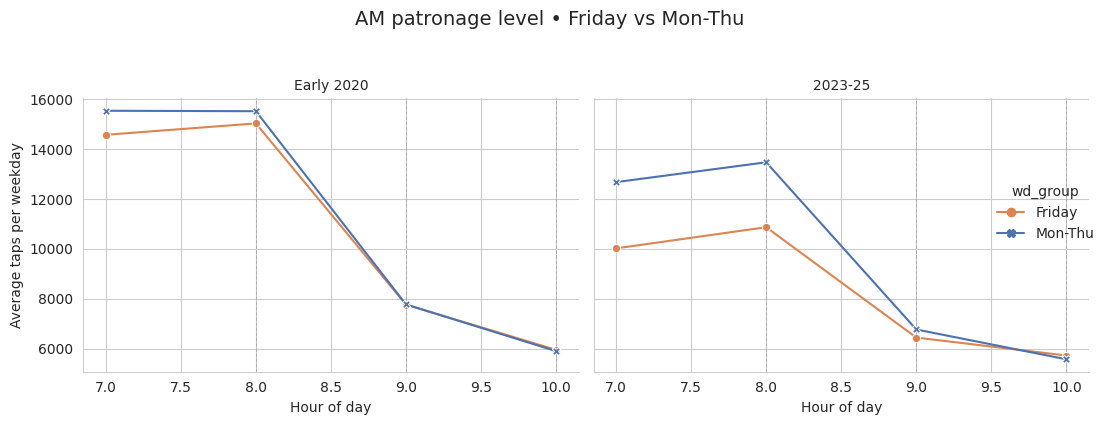

In [84]:
df['dow'] = df['trip_origin_date'].dt.dayofweek

df['era'] = np.select(
        [df['trip_origin_date'] <  '2020-03-01',
         df['trip_origin_date'] >= '2023-01-01'],
        ['pre', 'post'],
        default='ignore'
    )
df = df[df['era'] != 'ignore']

# 1. keep AM window 07-10 and weekdays only
morning = df[(df['dow'] <= 4) & df['tap_hour'].between(7, 10)].copy()

# 2. map weekday group + era label (nice names)
morning['wd_group']   = np.where(morning['dow'] == 4, 'Friday', 'Mon-Thu')
morning['era_label']  = morning['era'].map({'pre':'Early 2020', 'post':'2023-25'})

# 3. average taps per hour per weekday (so eras with more weeks don’t dominate)
hourly_avg = (morning
              .groupby(['era_label','wd_group','tap_hour'], as_index=False)
              ['Tap_Ons'].mean())

# 4. facet line plot
sns.set_style('whitegrid')
g = sns.relplot(
    data   = hourly_avg,
    x      = 'tap_hour',
    y      = 'Tap_Ons',
    hue    = 'wd_group', style='wd_group',
    kind   = 'line', markers=True, dashes=False,
    col    = 'era_label', col_order=['Early 2020','2023-25'],
    height = 4, aspect = 1.25,
    palette = {'Mon-Thu':'#4c72b0', 'Friday':'#dd8452'}
)

g.set_axis_labels('Hour of day', 'Average taps per weekday')
g.set_titles('{col_name}')
for ax in g.axes.flat:                         # reference lines
    for h in (8, 9, 10):
        ax.axvline(h, ls='--', lw=0.7, c='grey', alpha=0.4)

plt.suptitle('AM patronage level • Friday vs Mon-Thu', y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

